# Lab 05. 결정 경계와 데이터 포인트 시각화
---

- 파이토치를 사용하여 소프트맥스 회귀 모델을 학습하고 예측해보자.

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# make_blobs -> 가상 클러스터를 생성하여 랜덤한 데이터셋 만들때 많이 사용함. (군집화 데이터 혹은 그룹 데이터) 

## 데이터 생성

In [2]:
x, y = make_blobs(n_samples=10000, centers=3, n_features=2, random_state=77)

x = torch.from_numpy(x).float()
y = torch.from_numpy(y)

## 모델 정의 

In [3]:
class SoftmaxRegression(nn.Module) : 
    def __init__(self, input_size, num_classes) : 
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x) : 
        out = self.linear(x)
        
        return out

model = SoftmaxRegression(input_size=2, num_classes=3)

## Loss 함수 / 옵티마이저 정의

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

## Train Loop

In [5]:
num_epochs = 1000
for epoch in range(num_epochs) : 
    
    # Forward pass 
    output = model(x)
    loss = criterion(output, y)
    
    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # print
    if (epoch+1) % 100 == 0 :
        print("Epoch [{}/{}] , Loss : {:.4f}".format(
            epoch+1, num_epochs, loss.item()
        ))

Epoch [100/1000] , Loss : 0.0318
Epoch [200/1000] , Loss : 0.0161
Epoch [300/1000] , Loss : 0.0110
Epoch [400/1000] , Loss : 0.0084
Epoch [500/1000] , Loss : 0.0069
Epoch [600/1000] , Loss : 0.0058
Epoch [700/1000] , Loss : 0.0051
Epoch [800/1000] , Loss : 0.0045
Epoch [900/1000] , Loss : 0.0040
Epoch [1000/1000] , Loss : 0.0037


## 시각화 

/opt/homebrew/Caskroom/miniforge/base/envs/AI/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525682339/work/aten/src/ATen/native/TensorShape.cpp:3191.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


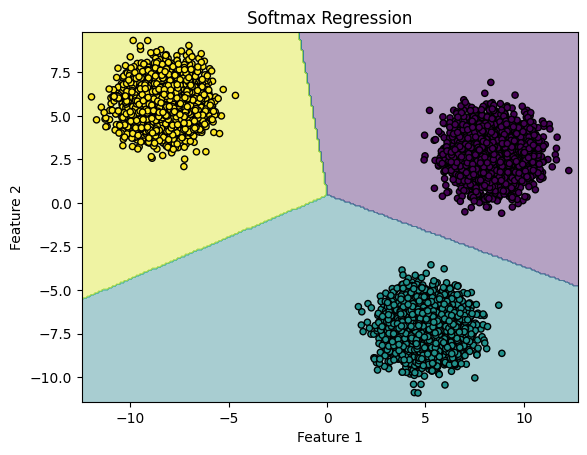

In [6]:
# Plot decision boundary
x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1))
Z = model(torch.cat((xx.reshape(-1, 1), yy.reshape(-1, 1)), dim=1)).argmax(dim=1)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(x[:, 0], x[:, 1], c=y, s=20, edgecolors='k')
plt.title('Softmax Regression')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()